In [5]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=2000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 1013, '11': 987}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

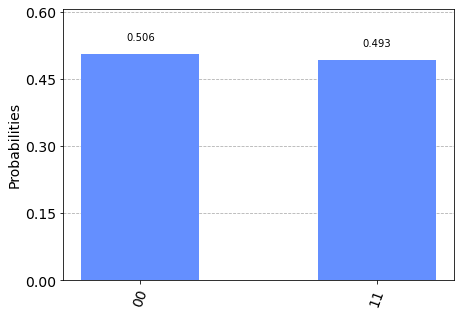

In [6]:
# Plot a histogram
plot_histogram(counts)

# Getting started with Qiskit

In [7]:
import numpy as np
from qiskit import *
%matplotlib inline

In [8]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)


In [9]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

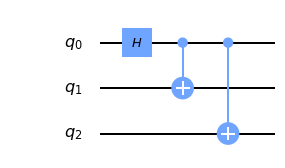

In [10]:
circ.draw('mpl')

In [11]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [12]:
# Create a Quantum Program for execution
job = execute(circ, backend)

In [13]:
result = job.result()

In [14]:
outputState = result.get_statevector(circ, decimals=3)
print(outputState)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


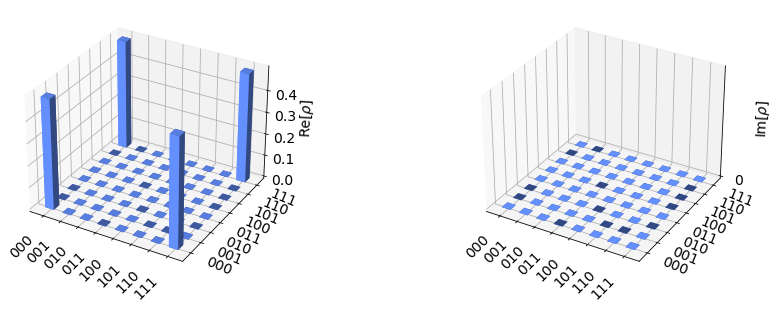

In [15]:
from qiskit.visualization import plot_state_city
plot_state_city(outputState)

In [16]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

#shows the result
print(result.get_unitary(circ, decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


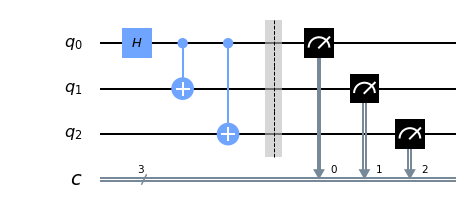

In [17]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3, name="meas Circuit")
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit cirbuit object supports composition using
# the addition operator.
qc = circ + meas

# drawing the circuit
qc.draw('mpl')

In [18]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=5000)

# Grab the results from the job.
results_sim = job_sim.result()

In [19]:
counts = results_sim.get_counts(qc)
print(counts)

{'000': 2424, '111': 2576}


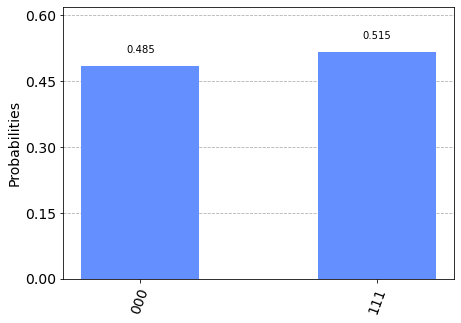

In [20]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [21]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright